# 668 Final Project

Isaac Hawn

Following is the results of my numerical experimentation on problems 9.30 and 10.15. In 9.30, I test both the Gradient Descent and Newton's Method for solving unconstrained minimization problems. I test such things as convergence rate, effect of parameters, and runtime vs problem size. In 10.15, I implement three ways of solving equality constrained minimziation problems: Feasible Start Newton Method, Infeasible Start Newton Method, and the Dual Method. I demonstrate how each method gives the same answer to the problem within some tolerance $\epsilon$. I also compare computational strain per iteration for each of these three methods. For each method in 9.30 and 10.15, except for the dual, I plot the solution convergence on a three dimensional objective before solving problems of a larger size. This is so a graph can be plotted, and a more visual understanding can be obtained before moving on to large problems.

$\textbf{9.30}$

We consider the following unconstrained minimization problem:

$$\text{minimize } f(x) = -\sum_{i = 1}^m \log(1 - a^T_i x) - \sum_{i = 1}^n \log(1 - x^2_i)$$

With variable $x \in \mathbb{R}^n$, and $dom f = \{x|a^T_i x < 1, i = 1,...,m, |x_i| < 1, i = 1,...,n\}$. We choose initial point $x_0 = \vec{0}$ and generate matrix $A$ randomly.

$\textbf{(a)}$

We will first use the gradient method to solve the problem, showing several relevent plots to visualize the iterative convergence.

We define the gradient descent method as follows:

$$$$
$\text{while } \|\nabla f(x) \|_2 > \eta$

$\text{1) } \Delta x := -\nabla f(x)$

$\text{2) Determine } t \text{ using backtracking line search}$

$\text{3) }x := x + t \Delta x$
$$$$

First we define the two sum terms in our objective programmatically:

In [1]:
using LinearAlgebra
using Calculus
using Plots

#Returns first term of f
function Sum_1(_A, _x, _m)
    sum = 0
    At = transpose(_A)

    for i = 1:_m
       sum += log(1 - (At[[i],:] * _x)[1]) 
    end
    
    return -sum
end

#Returns second term of f
function Sum_2(_x, _n)
    sum = 0
    
    for i = 1:_n
        sum += log(1 - _x[i]^2)
    end
    
    return -sum
end


Sum_2 (generic function with 1 method)

Next, we program our descent method with $\Delta x = -\nabla f(x)$ and stopping condition $\|\nabla f(x) \|_2 \leq \eta$ where $\eta$ is some predefined tolerance. The value of $t$ in our update step will be determined each iteration using backtracking line search.

In [2]:
#=
This script cell contains all the methods I wrote to 
compute the solution using the Gradient Descent Method.
There is also some extra code to store the date for
graphing purposes
=#


#Use Calculus.jl library to compute the gradient numerically
function Compute_Gradient(_f, _x, _n)

    _∇f = Calculus.gradient(g -> _f(g),_x)

    return _∇f
end

#Choose t using backgracking line search
function Back_Line_Search(_x, _f, _∇f, _α, _β, _n)

    _t = 1
    fx = _f(_x)
    _it = 1

    while _f((_x + _t*-_∇f)) > fx + _α*_t*transpose(_∇f)*-_∇f
        _t *= β
  #      print("\n",_it)
        _it+=1
        
    end

    return _t, _it
end

#Main solution method
function Grad_Descent(_f, _x, _n, _α, _β, _η, maxIt, _p, graphDistance, printData)
    itTotal = 0
    it = 0;
    t = 1
    ∇fVal = Compute_Gradient(_f, _x, _n)
    normGrad = norm(∇fVal)
    
    val = _f(_x)
    
    #Stopping conditions: norm(∇f) <= η or iterations exceeds maximum iteration tolerance
    while normGrad > η && it < maxIt
        
        #Store solution difference data for plotting
        if graphDistance
            push!(distanceFromSol, abs(val - _p))
            push!(iter, it)
        end
        
        #Store iteration position data to plot later if 2 independent variables
        if _n == 2 && !graphDistance
            push!(xPlot,_x[1])
            push!(yPlot,_x[2]) 
        end
                
        ∇fVal = Compute_Gradient(_f, _x, _n) #Evaluate gradient at current point
        normGrad = norm(∇fVal) #Compute euclidean norm using LinearAlgebra library

        
        #Perform backgracking line search to pick t
        bls = Back_Line_Search(_x, _f, ∇fVal, _α, _β, _n)
        t = bls[1]
                
        #update step
        _x -= t*∇fVal
        
        val = _f(_x)
        
        
        if(printData)
            print("\n\nIteration: ", it)
            print("\nGradient Norm = ", normGrad)
            print("\nDescent Direction = ", -∇fVal)
            print("\nt = ", t)
            print("\nx = ",_x)
            print("\nf(x) = ", val)
        end
        
        it += 1
        itTotal += 1 + bls[2]
      #  print("\n",bls[2])
    end
    
    return val, it, itTotal
end



Grad_Descent (generic function with 1 method)

$\textbf{Displaying Results for } \mathbb{R}^2$

As a general visualization, displayed first is a simple version of this problem where $x \in \mathbb{R}^2$ and $A \in \mathbb{R}^{2 x 2}$. This is usefull in the sense that we can visually intepret the gradient descent method before moving on to versions of this problem in a higher dimension.

In [3]:
#Plotting variables
xPlot = Float64[]
yPlot = Float64[]
iter = Int[]
distanceFromSol = Float64[]

#Problem parameters
n = 2
m = 2
A = rand(n,m)*0.01
x = ones(n) * 0.4 #I start at the point (0.4, 0.4) so the iterative points can be seen more clearly
maxIterations = 1e6

f(z) = Sum_1(A, z, m) + Sum_2(z, n) #define objective as sum of the two terms defined previously

α = 0.3
β = 0.9
η = 1e-6

p = Grad_Descent(f, x, n, α, β, η, maxIterations, 0, false, false)[1] # 0 is just a placeholder until p* is calculated
Grad_Descent(f, x, n, α, β, η, maxIterations, p, true, true) # Perform gradient descent again to plot solution difference



Iteration: 0
Gradient Norm = 1.355571861451804
Descent Direction = [-0.9567175620426027, -0.9603471133080828]
t = 0.5314410000000002
x = [-0.108438937889483, -0.1103678302435609]
f(x) = 0.022740007353557405

Iteration: 1
Gradient Norm = 0.3045253147890683
Descent Direction = [0.21513853311225942, 0.21552512363454612]
t = 0.6561000000000001
x = [0.032713453685470434, 0.031038203373064843]
f(x) = 0.002422498509593748

Iteration: 2
Gradient Norm = 0.09892413405283575
Descent Direction = [-0.0698215583595465, -0.07007805852296323]
t = 0.6561000000000001
x = [-0.013096470754228033, -0.014940010823851338]
f(x) = 0.0002195288981141064

Iteration: 3
Gradient Norm = 0.030987089580559395
Descent Direction = [0.02187437352797063, 0.02194792708736819]
t = 0.6561000000000001
x = [0.0012553057174735007, -0.0005399758618290645]
f(x) = 3.0074658378242546e-6

Iteration: 4
Gradient Norm = 0.009683070965957353
Descent Direction = [-0.006834145380796415, -0.006859760946702536]
t = 0.6561000000000001
x =

(-2.043227598167311e-5, 13, 80)

Below is the graph of our objective in $\mathbb{R}^2$ with each gradient descent iteration.

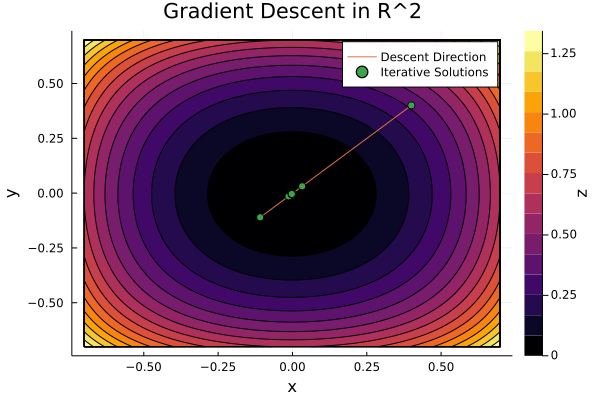

In [4]:
plotf(x,y) = f([x, y])
_x = -0.7:0.003:0.7
_y = -0.7:0.003:0.7
X = repeat(reshape(_x, 1, :), length(_y), 1)
Y = repeat(_y, 1, length(_x))
Z = map(plotf, X, Y)
p1 = Plots.contour(_x,_y, plotf, fill = true)
plot(p1, title = "Gradient Descent in R^2", xlabel = "x", ylabel = "y", colorbar_title = "z")
plot!(xPlot, yPlot, label = "Descent Direction")
scatter!(xPlot,yPlot, label = "Iterative Solutions")

Below is a plot of our solution difference $f - p^*$ vs iteration count on a logorithmic scale.

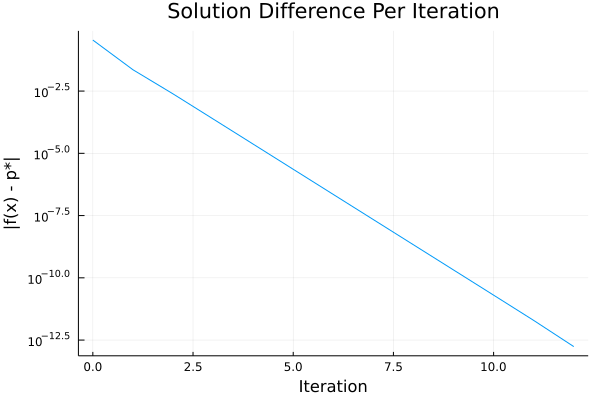

In [5]:
plot(iter, distanceFromSol, yaxis=:log,  title = "Solution Difference Per Iteration", xlabel = "Iteration", ylabel = "|f(x) - p*|", legend = false)

$\textbf{Alpha-Beta Analysis}$

We will now experiment with different values for $\alpha$ and $\beta$ to determine their effect on algorithm iteration count. Below is a function for this purpose:

In [6]:
BLAS.set_num_threads(8) #Set thread count for performance reasons


#Function to benchmark the algorithm given different α, β values
function αβ_Experiment(res1, res2)
    i = 0
    j = 0
    
    #Cycle through α-β grid and store iteration count in matrix
    for α = 1e-3:0.5/res1:0.5-1e-3  # α loop
        i+=1
        push!(αVals, α)
        for β = 1e-3:1.0/res2:1.0-1e-3 # β loop
            j+=1
            push!(βVals, β)
            print("\n\nalpha = ", α)
            print("\nbeta = ", β)

            time[i, j] = Grad_Descent(f, x, n, α, β, η, maxIterations, 0, false, false)[2]
            print("\nTotal Iterations = ", time[i,j])
        end
        j = 0
    end
end

αβ_Experiment (generic function with 1 method)

In [ ]:
    
αVals = Float64[]
βVals = Float64[]
resα = 25
resβ = 25
time = zeros(resα, resβ)

αβ_Experiment(resα, resβ)

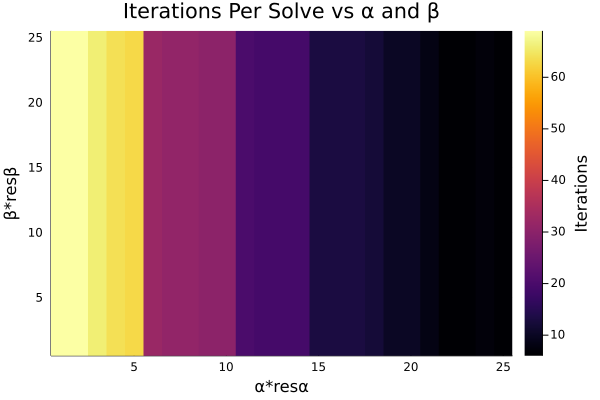

In [8]:
αβ(x,y) = time[x, y]
_x = 1:1:resα
_y = 1:1:resβ
_α = 2e-3:0.5/resα:0.5-1e-3
_β = 2e-3:1.0/resβ:1.0-1e-3
X = repeat(reshape(_x, 1, :), length(_y), 1)
Y = repeat(_y, 1, length(_x))
Z = map(αβ, X, Y)
p1 = Plots.heatmap(_x ,_y, αβ, fill = true)
plot(p1, xlabel = "α*resα", ylabel = "β*resβ", title = "Iterations Per Solve vs α and β", colorbar_title = "Iterations")


$\alpha*res \alpha$ here is the scaled $\alpha$ value based on the benchmark step size. In this case, $\alpha*res \alpha = 25$ would correspond to $\alpha = 0.5 - \epsilon$ where $\epsilon$ dictates the ceiling tolerence of the $\alpha$ range.

An interesting result to note from this graph is that $\beta$ seems to have no effect on the iteration count. Although, computational effort per iteration will be affected by $\beta$ as changes in $\beta$ will have an effect on the backgracking line search.

$\textbf{Problems of Larger Dimension}$

This information can be extended to problems of higher dimension. Below are the same plots for these higher dimension problems, excluding the spacial graph for obvious reasons.

We first observe results from a problem with $n = 10$ and $m = 20$

In [9]:
iter = Int[]
distanceFromSol = Float64[]

#Problem parameters
n = 10
m = 20
A = 0.01*rand(n,m)
x = zeros(n)
maxIterations = 1e6

f(z) = Sum_1(A, z, m) + Sum_2(z, n) #define objective as sum of the two terms defined previously

α = 0.3
β = 0.9
η = 1e-6

p = Grad_Descent(f, x, n, α, β, η, maxIterations, 0, false, false)[1] # 0 is just a placeholder until p* is calculated
Grad_Descent(f, x, n, α, β, η, maxIterations, p, true, true) # Perform gradient descent again to plot solution difference



Iteration: 0
Gradient Norm = 0.31223882112643825
Descent Direction = [-0.09907290089902118, -0.10409898018629567, -0.09608952002943179, -0.0866087475646191, -0.08037940248278949, -0.09844547841136378, -0.11250794072653147, -0.09527276767046255, -0.11418645946436307, -0.09581715901445592]
t = 0.6561000000000001
x = [-0.0650017302798478, -0.0682993409002286, -0.0630443340913102, -0.056823999277146604, -0.052736925968958195, -0.06459007838569579, -0.07381645991067731, -0.06250846286859049, -0.07491773605456863, -0.06286563802938454]
f(x) = -0.02180105006185727

Iteration: 1
Gradient Norm = 0.10029861739810347
Descent Direction = [0.031813675501546505, 0.033470923916238536, 0.03082253924149561, 0.027688196927203673, 0.025651469414480623, 0.03158288930672371, 0.03630438459957144, 0.030550579501687446, 0.03687440186454007, 0.030727678709605615]
t = 0.6561000000000001
x = [-0.04412877778328314, -0.04633906771878449, -0.04282166609496493, -0.03865777327320827, -0.035906996886117454, -0.04386

(-0.024282077021872846, 13, 78)

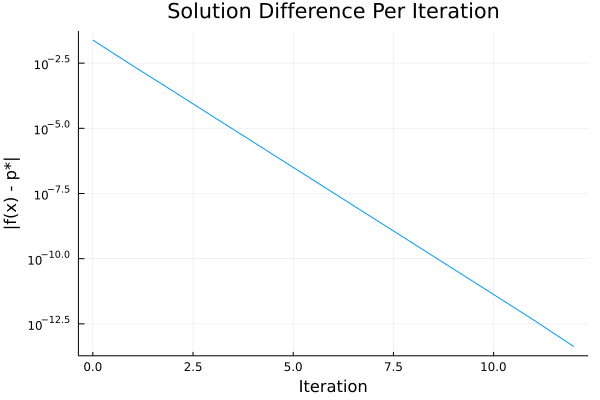

In [10]:
plot(iter, distanceFromSol, yaxis=:log,  title = "Solution Difference Per Iteration", xlabel = "Iteration", ylabel = "|f(x) - p*|", legend = false)

In [ ]:
αVals = Float64[]
βVals = Float64[]
resα = 25
resβ = 25
time = zeros(resα, resβ)

αβ_Experiment(resα, resβ)

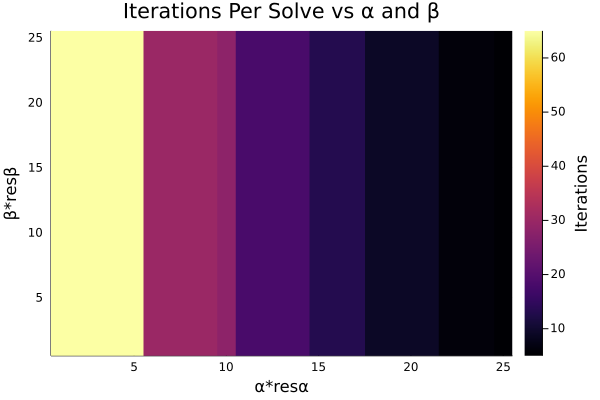

In [12]:

αβ(x,y) = time[x, y]
_x = 1:1:resα
_y = 1:1:resβ
_α = 2e-3:0.5/resα:0.5-1e-3
_β = 2e-3:1.0/resβ:1.0-1e-3
X = repeat(reshape(_x, 1, :), length(_y), 1)
Y = repeat(_y, 1, length(_x))
Z = map(αβ, X, Y)
p1 = Plots.heatmap(_x ,_y, αβ, fill = true)
plot(p1, xlabel = "α*resα", ylabel = "β*resβ", title = "Iterations Per Solve vs α and β", colorbar_title = "Iterations")

$\textbf{An Even Larger Problem}$

Finally, we observe results from a problem with $n = 100$ and $m = 100$

In [ ]:
iter = Int[]
distanceFromSol = Float64[]

#Problem parameters
n = 100
m = 100
A = 0.005*rand(n,m)
x = zeros(n)
maxIterations = 1e6

f(z) = Sum_1(A, z, m) + Sum_2(z, n) #define objective as sum of the two terms defined previously

α = 0.3
β = 0.9
η = 1e-6

p = Grad_Descent(f, x, n, α, β, η, maxIterations, 0, false, false)[1] # 0 is just a placeholder until p* is calculated
Grad_Descent(f, x, n, α, β, η, maxIterations, p, true, true) # Perform gradient descent again to plot solution difference

The output is not displayed for this problem do to the length. However, the relevent data is still stored and plotted below

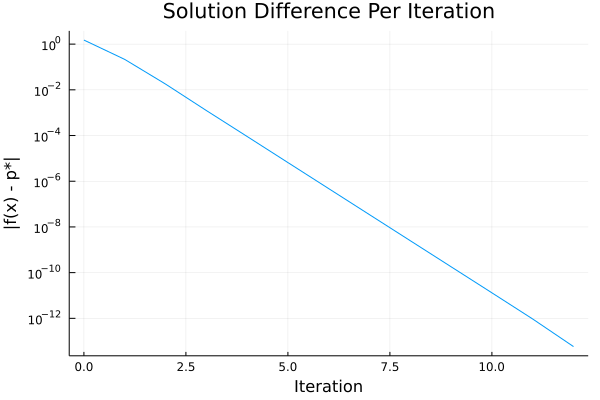

In [14]:
plot(iter, distanceFromSol, yaxis=:log,  title = "Solution Difference Per Iteration", xlabel = "Iteration", ylabel = "|f(x) - p*|", legend = false)

Due to the time required to compute, we will not be running the $\alpha$-$\beta$ analysis on this problem.

$\textbf{Algorithm Runtime vs Problem Size}$

While the results above show that problem size has little effect on algorithm iteration count, it does have a large effect on runtime. This is illustrated below:

In [ ]:
#Function to benchmark algorithm runtime over the m x n grid
function Bench_Prob_Size(max, cyclesPerIt)
    
    maxIterations = 1e6

    α = 0.3
    β = 0.9
    η = 1e-6
    
    time = zeros(max,max)
    
    for n = 1:max
       for m = 1:max
            A = (1.0/m)*rand(n,m)
            x = zeros(n)

            f(z) = Sum_1(A, z, m) + Sum_2(z, n)
            
            
            sum = 0
            
            #Average out runtime for a fixed m and n to reduce outliers
            for i = 1:cyclesPerIt
                sum += @elapsed Grad_Descent(f, x, n, α, β, η, maxIterations, 0, false, false)
            end
            
            time[n,m] = sum/cyclesPerIt
            
            print("\nSize ", n, " x ", m, " completed in average time of ", time[n,m], " seconds")
        end
    end
    
    return time
end

maxProbSize = 50
_x = 1:maxProbSize
_y = 1:maxProbSize
_time = Bench_Prob_Size(maxProbSize, 5)[_x, _y]

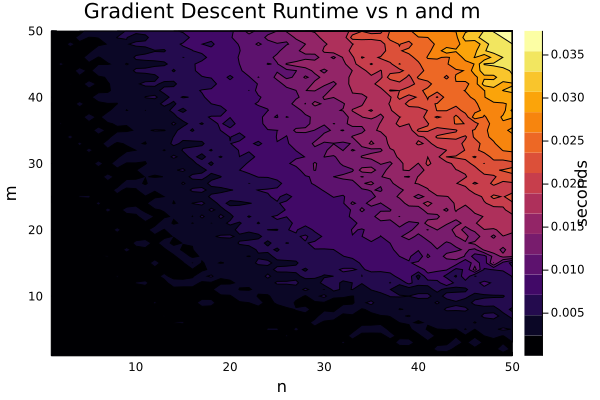

In [49]:
times(x,y) = _time[x, y]
X = repeat(reshape(_x, 1, :), length(_y), 1)
Y = repeat(_y, 1, length(_x))
Z = map(times, X, Y)
p1 = Plots.contour(_x ,_y, times, fill = true)
plot(p1, title = "Gradient Descent Runtime vs n and m", xlabel = "n", ylabel = "m", colorbar_title = "seconds", colorbar_titlefontrotation = 90)

$\textbf{(b)}$

Now we will repeat this analysis using Newton's method instead as our solving algorithm. This algorithm is outlined as follows:

$$$$
$\text{while } \frac{\lambda^2}{2} > \epsilon$

$\text{1) Compute Newton Step and Decrement:}$

$\rightarrow \nabla^2 f(x) \Delta x_{nt} = -\nabla f(x); \lambda^2 = \nabla f(x)^T \nabla^2 f(x)^{-1} \nabla f(x)$

$\text{2) Determine } t \text{ using backtracking line search}$

$\text{3) }x := x + t \Delta x_{nt}$
$$$$



In [17]:
#=
This script cell contains all the methods I wrote to 
compute the solution using Newton's Method
There is also some extra code to store the date for
graphing purposes
=#

#Computes the Gradient
function Compute_Gradient(_f, _x, _n)
    return Calculus.gradient(g -> _f(g),_x)
end

#Computes the hessian
function Compute_Hessian(_f, _x, _n)
    return Calculus.hessian(h -> _f(h),_x)
end

#Choose t using backgracking line search
function BLS(_x, _f, _fx, _∇f, _∇xnt, _α, _β, _n)

    _t = 1

    while _f((_x + _t*_∇xnt)) > _fx + _α*_t*transpose(_∇f)*_∇xnt
        _t *= β
    end

    return _t
end

#Computes Newton step
function Newton_Step(_∇f, _∇2f, _x, _n)
    return _∇2f\-_∇f
end

#Computes Newton decrement
function Newton_Decrement(_∇2f, _Δxnt)
    return transpose(_Δxnt)*_∇2f*_Δxnt
end

function Unconstrained_Newton(_f, _x, _n, _α, _β, _ϵ, _p, maxIt, printData, graphDistance)
    
    λ2 = 1 #prime λ
    it = 0
    val = _f(_x)
    
    while λ2 > ϵ && it < maxIt
        
        #Store iteration position data to plot later if 2 independent variables
        if _n == 2 && !graphDistance
            push!(xPlot,_x[1])
            push!(yPlot,_x[2]) 
        end
           
        #Store solution difference data for plotting
        if graphDistance
            push!(distanceFromSol, abs(val - _p))
            push!(iter, it)
        end
        
                   
        #Objective, Gradient, and Hessian
        val = _f(_x)
        ∇f = Compute_Gradient(_f, _x, _n)
        ∇2f = Compute_Hessian(_f, _x, _n)
        

        #Newton step
        Δxnt = Newton_Step(∇f, ∇2f, _x, _n)

        #Newton decrement
        λ2 = Newton_Decrement(∇2f, Δxnt)

        #Choose t with backtracking line search
        t = BLS(_x, _f, val, ∇f, Δxnt, _α, _β, _n)


        #If verbosity is true
        if printData
            print("\n\nIteration: ", it)
            print("\nNewton step = ", Δxnt)
            print("\nλ^2 = ", λ2)
            print("\nt = ", t)
            print("\nx = ", _x)
            print("\nf(x) = ", val)
        end
        
        #Update x
        _x += t*Δxnt
        
        
        it+=1
    end
    
    
    return val, it, _x
end

Unconstrained_Newton (generic function with 1 method)

$\textbf{Displaying Results For } \mathbb{R}^2$

As in the Gradient Descent Method, we will start by performing Newton's Method in the $\mathbb{R}^2$ setting to get a better spacial understanding of what this method is doing.

In [50]:
#Plotting variables
xPlot = Float64[]
yPlot = Float64[]
iter = Int[]
distanceFromSol = Float64[]


#Problem parameters
n = 2
m = 2
A = rand(n,m)/2.0
x = -0.99*ones(n) # I am not starting at zero for this method so that more iterations are required.
                  # This is so there are more datapoints to plot. Starting at 0 makes it hard to 
                  # see the quadratic convergence.
maxIterations = 1e3

f(z) = Sum_1(A, z, m) + Sum_2(z, n) #define objective as sum of the two terms defined previously

α = 0.3
β = 0.9
ϵ = 1e-10

p = Unconstrained_Newton(f, x, n, α, β, ϵ, 0, maxIterations, false, false)[1] #Again, 0 is just a placeholder for p
Unconstrained_Newton(f, x, n, α, β, ϵ, p, maxIterations, true, true)



Iteration: 0
Newton step = [0.009931218489925125, 0.009914589637080183]
λ^2 = 1.9693481933252448
t = 1
x = [-0.99, -0.99]
f(x) = 7.213202923979099

Iteration: 1
Newton step = [0.01965554138254073, 0.019573155134404465]
λ^2 = 1.9387886042048637
t = 1
x = [-0.9800687815100748, -0.9800854103629199]
f(x) = 5.849898621655524

Iteration: 2
Newton step = [0.03847985892361216, 0.03812402708210417]
λ^2 = 1.8779741475554406
t = 1
x = [-0.960413240127534, -0.9605122552285154]
f(x) = 4.509517153044604

Iteration: 3
Newton step = [0.07361161539422327, 0.07218141833607399]
λ^2 = 1.7578083181446167
t = 1
x = [-0.9219333812039219, -0.9223882281464112]
f(x) = 3.214752181338324

Iteration: 4
Newton step = [0.1337431308487775, 0.1284013018526639]
λ^2 = 1.5251840687783198
t = 1
x = [-0.8483217658096986, -0.8502068098103372]
f(x) = 2.0100807118258466

Iteration: 5
Newton step = [0.21449298011591186, 0.19723680990473377]
λ^2 = 1.1038230082397347
t = 1
x = [-0.7145786349609211, -0.7218055079576733]
f(x) = 

(-0.06932475402911045, 11, [-0.12246071662225046, -0.21444660084640554])

$\textbf{Graphing the Results}$


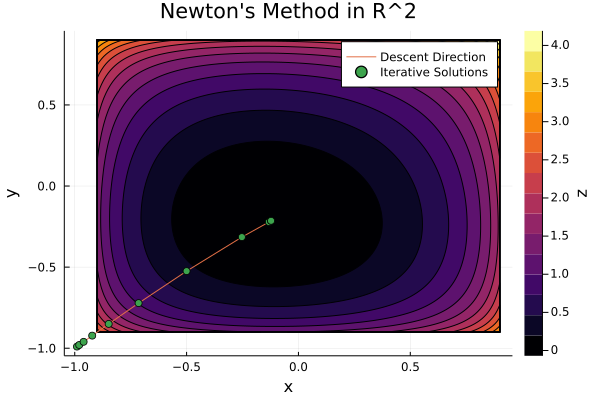

In [51]:
plotf(x,y) = f([x, y])
_x = -0.9:0.01:0.9
_y = -0.9:0.01:0.9
X = repeat(reshape(_x, 1, :), length(_y), 1)
Y = repeat(_y, 1, length(_x))
Z = map(plotf, X, Y)
p1 = Plots.contour(_x,_y, plotf, fill = true)
plot(p1, title = "Newton's Method in R^2", xlabel = "x", ylabel = "y", colorbar_title = "z")
plot!(xPlot, yPlot, label = "Descent Direction")
scatter!(xPlot,yPlot, label = "Iterative Solutions")

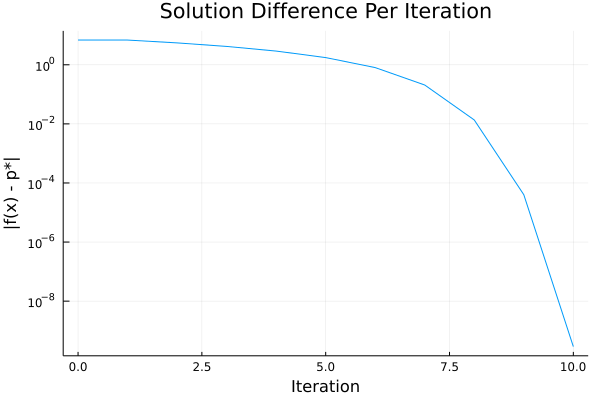

In [20]:
plot(iter, distanceFromSol, yaxis=:log,  title = "Solution Difference Per Iteration", xlabel = "Iteration", ylabel = "|f(x) - p*|", legend = false)

Notice that we are getting quadratic convergence. 

Below, is the $\alpha \beta$ analysis for this problem.

In [21]:
#Function to benchmark the algorithm given different α, β values
function αβ_Experiment(res1, res2)
    i = 0
    j = 0
    
    #Cycle through α-β grid and store iteration count in matrix
    for α = 1e-3:0.5/res1:0.5-1e-3  # α loop
        i+=1
        push!(αVals, α)
        for β = 1e-3:1.0/res2:1.0-1e-3 # β loop
            j+=1
            push!(βVals, β)
            print("\n\nalpha = ", α)
            print("\nbeta = ", β)

            iter[i, j] = Unconstrained_Newton(f, x, n, α, β, ϵ, p, maxIterations, false, false)[2]
            print("\nTotal Iterations = ", iter[i,j])
        end
        j = 0
    end
end

αβ_Experiment (generic function with 1 method)

In [ ]:
αVals = Float64[]
βVals = Float64[]
resα = 25
resβ = 25
iter = zeros(resα, resβ)

αβ_Experiment(resα, resβ)

Notice that for Newton's Method, $\alpha$ and $\beta$ seem to have no effect on iteration count.

$\textbf{Problems of Larger Dimension}$

Just as for the Gradient Method, we will now experiment with larger problems.

We first observe results from a problem with $n = 10$ and $m = 20$

In [23]:
iter = Int[]
distanceFromSol = Float64[]


#Problem parameters
n = 10
m = 20
A = rand(n,m)/2
x = -0.99*ones(n)
maxIterations = 1e3

f(z) = Sum_1(A, z, m) + Sum_2(z, n)

α = 0.3
β = 0.9
ϵ = 1e-10

p = Unconstrained_Newton(f, x, n, α, β, ϵ, 0, maxIterations, false, false)[1] #Again, 0 is just a placeholder for p
Unconstrained_Newton(f, x, n, α, β, ϵ, p, maxIterations, true, true)



Iteration: 0
Newton step = [0.009804407571233414, 0.00979324439776363, 0.009781824338525598, 0.00983016872812356, 0.00982126128283599, 0.00978305714762651, 0.009803514181832902, 0.0098139074922663, 0.009794917588477716, 0.00983199883071527]
λ^2 = 9.616690823738898
t = 1
x = [-0.99, -0.99, -0.99, -0.99, -0.99, -0.99, -0.99, -0.99, -0.99, -0.99]
f(x) = 14.512548838693839

Iteration: 1
Newton step = [0.019027431513589755, 0.01897290679836225, 0.018917156368461332, 0.019153987138941973, 0.019110234444123218, 0.01892316396195238, 0.0190231686275733, 0.01907419968056882, 0.01898104925563127, 0.019163057881424642]
λ^2 = 9.241138248868197
t = 1
x = [-0.9801955924287665, -0.9802067556022364, -0.9802181756614744, -0.9801698312718764, -0.980178738717164, -0.9802169428523735, -0.9801964858181671, -0.9801860925077337, -0.9802050824115223, -0.9801680011692847]
f(x) = 7.868395193452773

Iteration: 2
Newton step = [0.03577131021173076, 0.03554260188896106, 0.03530902709575838, 0.036308167461927374, 

(-13.71716199735, 10, [-0.6155577023402005, -0.6349481048760456, -0.6531846892093464, -0.5586680677150055, -0.5791741027328223, -0.6513197940624604, -0.6157769220127858, -0.5943456930131229, -0.6322305528430454, -0.55304041887599])

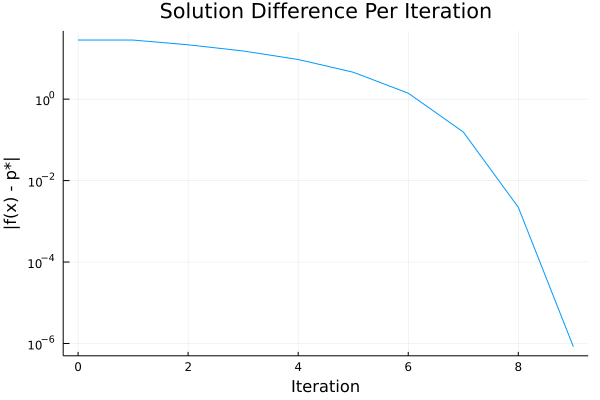

In [24]:
plot(iter, distanceFromSol, yaxis=:log,  title = "Solution Difference Per Iteration", xlabel = "Iteration", ylabel = "|f(x) - p*|", legend = false)

In [ ]:
αVals = Float64[]
βVals = Float64[]
resα = 25
resβ = 25
iter = zeros(resα, resβ)

αβ_Experiment(resα, resβ)

Notice no changes in iteration count for different $\alpha$ - $\beta$ values just as before

$\textbf{An Even Larger Problem}$

Finally, we observe results from a problem with $n = 100$ and $m = 100$

In [ ]:
iter = Int[]
distanceFromSol = Float64[]


#Problem parameters
n = 100
m = 100
A = rand(n,m)/2
x = -0.99*ones(n)
maxIterations = 1e3

f(z) = Sum_1(A, z, m) + Sum_2(z, n)

α = 0.3
β = 0.9
ϵ = 1e-10

p = Unconstrained_Newton(f, x, n, α, β, ϵ, 0, maxIterations, false, false)[1] #Again, 0 is just a placeholder for p
Unconstrained_Newton(f, x, n, α, β, ϵ, p, maxIterations, true, true)

Just as before, this problem is too large to display the data, but the relevent plots are still shown below for this computation.

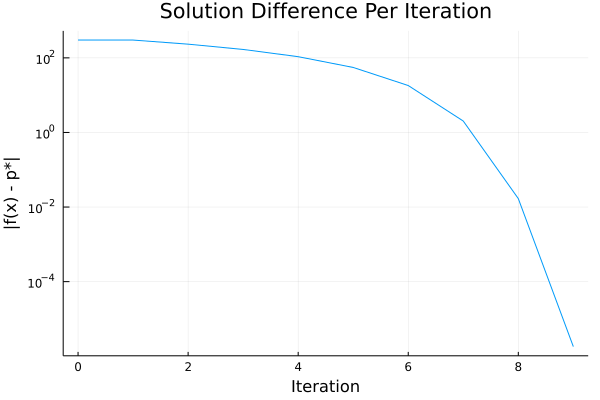

In [27]:
plot(iter, distanceFromSol, yaxis=:log,  title = "Solution Difference Per Iteration", xlabel = "Iteration", ylabel = "|f(x) - p*|", legend = false)

$\textbf{Algorithm Runtime vs Problem Size}$

Just as in the Gradient Method, problem size has a large impact on runtime. This is illustrated below:

In [ ]:
#Function to benchmark algorithm runtime over the m x n grid
function Bench_Prob_Size(max, cyclesPerIt)
    
    maxIterations = 1e6

    α = 0.3
    β = 0.9
    η = 1e-6
    
    time = zeros(max,max)
    
    for n = 1:max
       for m = 1:max
            A = (1.0/m)*rand(n,m)
            x = zeros(n) #Start at zero to converge faster since we are dealing with many computations

            f(z) = Sum_1(A, z, m) + Sum_2(z, n)
            
            
            sum = 0
            
            #Average out runtime for a fixed m and n to reduce outliers
            for i = 1:cyclesPerIt
                sum += @elapsed Unconstrained_Newton(f, x, n, α, β, ϵ, 0, maxIterations, false, false)
            end
            
            time[n,m] = sum/cyclesPerIt
            
            print("\nSize ", n, " x ", m, " completed in average time of ", time[n,m], " seconds")
        end
    end
    
    return time
end

maxProbSize = 25
_x = 1:maxProbSize
_y = 1:maxProbSize
_time = Bench_Prob_Size(maxProbSize, 5)[_x, _y]



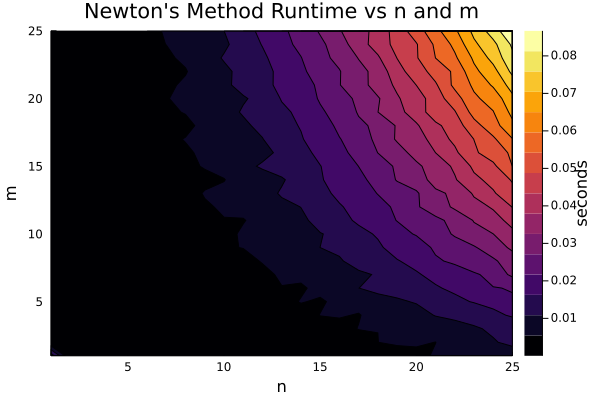

In [29]:
times(x,y) = _time[x, y]
X = repeat(reshape(_x, 1, :), length(_y), 1)
Y = repeat(_y, 1, length(_x))
Z = map(times, X, Y)
p1 = Plots.contour(_x ,_y, times, fill = true)
plot(p1, title = "Newton's Method Runtime vs n and m", xlabel = "n", ylabel = "m", colorbar_title = "seconds", colorbar_titlefontrotation = 90)

$\textbf{9.30 Conclusions}$

In general, both algorithms provide a good way of solving unconstrained minimization problems. The Gradient Method, with its high consistency, would be a good choice if it is not know whether or not $x_0$ is close to $p^*$. On the other hand, since Newton's Method converges quadratically, it has great speed when $x_0$ is close to $p^*$ but is very slow when $x_0$ is far away. Perhaps a good method of solving these unconstrained minimization problems would be to first use Gradient Descent for the first few iterations to get $x$ close to $p^*$ and then switch over to Newton's Method to take advantage of its quadratic convergence.

--------------------------------

$\textbf{10.15}$

In this problem we switch to an equality constrained minimization problem. Consider the problem:

$$\text{minimize } f(x) = \sum_{i=1}^n x_i \log(x_i)$$
$$\text{subject to } Ax = b$$

With $dom f = \mathbb{R}^n_{++}$ and $A \in \mathbb{R}^{p x n}$ with $p < n$. In this case, we consider $n = 100$ and $p = 30$ and we generate $\hat{x}$ at random with entries uniformly distributed on $[0,1]$. We then set $b = A\hat{x}$ so we will have that $\hat{x}$ is feasible. We generate $A$ randomly as well, checking that it has full rank. Below is a script that generates this problem:

In [ ]:
#Define our objective
function f(_x)
    _n = length(_x)
    sum = 0 
    
    for i = 1:_n
       sum += _x[i]*log(_x[i])
    end
    
    return sum
end

#Generates ECM problem with feasible starting point
function Generate_ECM(_n, _p, A_bound)
    _x = rand(_n)
    _A = rand(_p, _n)*A_bound 
    
    it = 0
    #Ensure A has full rank
    while rank(_A) != max(_n,_p) && it < 100 #Cap generation at 100 tries. The odds of needing this many are very low
        _A = rand(_p, _n)*A_bound 
        it+=1
    end
    
    _b = _A*_x
    
    return _A, _x, _b
end

#Define Problem Parameters
n = 100
p = 30
α = 0.3
β = 0.8
ϵ = 1e-8

ECM = Generate_ECM(n,p,1)

A = ECM[1]
x = ECM[2]
b = ECM[3]



$\textbf{(a)}$

We want to use the Standard Newton Method with equality constraints to solve this problem.

The algorithm to carry out this method is fairly straightforward. We start with a feasible $x$ satisfying $Ax = b$ and use that to compute $\Delta x_{nt}$ and $\lambda(x)$. $\Delta x_{nt}$ is calculated by solving the following system:

$$\begin{bmatrix} \nabla^2 f(x) & A^T \\ A & 0 \end{bmatrix} \begin{bmatrix} \Delta x_{nt} \\ w \end{bmatrix} = \begin{bmatrix} -\nabla f(x) \\ 0 \end{bmatrix}$$

We then iterate over $x_{n+1} = x_n + t \Delta x_{nt}$ while $\frac{\lambda^2}{2} > \epsilon$. We pick $t$ each iteration using backtracking line search just as in the unconstrained problem. 

Below is a script for this purpose:

In [95]:
using Calculus
using LinearAlgebra


#=
This function builds the coefficient matrix
in the system on page 526 (10.11) that is
used to compute the Newton Step
=#
function Build_J_Matrix(_A, _∇2f)
    a = size(_A,1)
    _At = transpose(_A)

    return [_∇2f _At; _A zeros(a,a)] 
end

#=
Computes the gradient _∇f at point _x
=#
function Compute_Gradient(_f, _x)
    return Calculus.gradient(g -> _f(g),_x)
end

#=
Computes the hessian _∇2f at point _x
=#
function Compute_Hessian(_f, _x)
    return hessian(h -> _f(h),_x)
end

#=
Builds c vector for Newton Step equation
=#
function Build_c(_∇f,_A, a, b)
    return [-_∇f; zeros(a)]
end

#=
Extracts Newton Step gradient from the
KKT equation
=#
function Extract_Step(_v, b)
    return _v[1:b]
end

#=
Computes Newton Step (p. 526 (10.11))
=#
function Compute_Newton_Step(_f, _∇f, _∇2f, _A, _x)
    #Compute Newton Step (p. 526 (10.11))
    a = size(_A,1)
    b = size(_∇f,1)
    _J = Build_J_Matrix(_A, _∇2f)
    _c = Build_c(_∇f, _A, a, b)
    _v = _J \ _c
    Δxn = Extract_Step(_v,b) #This is our Newton Step

    return Δxn
end

#=
Compute Newton Decrement (p. 527 (10.12))
=#
function Compute_Newton_Decrement(_Δxn, _∇2f)
    return abs(transpose(_Δxn) * _∇2f * _Δxn)
end

#=
Choose t with backtracking line search (p. 464 alg. 9.2)
=#
function Back_Line_Search(_x, _Δxn, _t, _f, fx, _∇f, _α, _β, _n)

    _t = 1
    
    while _f(_x + _t*_Δxn) > fx + _α*_t*transpose(_∇f)*_Δxn
        _t *= β
    end

    return _t
end


#=
Full solver: Minimize _g subject to _Ax = _b with tolerance = _ϵ
=#
function Solve_ECM(_g, _A, _b, _α, _β, _ϵ, x)

    obj = Float64
    i = 0
    t = 0.01
    λ2 = 10 #prime λ with a big number to ensure first iteration is run
    
    _n = length(x)
    it = 0

    while λ2 / 2 > ϵ
        
        #store plot data if 3d objective
        if _n == 2
            push!(xPlot, x[1])
            push!(yPlot, x[2]) 
        end
        
        obj = _g(x)
        
        print("\n\nIteration ", i)
        i += 1

        ∇g = Compute_Gradient(_g, x)
        ∇2g = Compute_Hessian(_g, x)
        Δxn = Compute_Newton_Step(_g, ∇g, ∇2g, _A, x)

        λ2 = Compute_Newton_Decrement(Δxn, ∇2g) #returns λ^2
        print("\nλ^2 =         ",λ2)

        t = Back_Line_Search(x, Δxn, t, _g, obj, ∇g, _α, _β, _n)

        #Update x
        x += t*Δxn

        print("\nObjective =   ", obj)
        it+=1
    end
    
    return obj, it
end

Solve_ECM (generic function with 1 method)

To get a visual sense of what this is doing, we will first solve a problem with $n = 2$ so we can graph the results.

In [ ]:
n = 2
p = 1
α = 0.3
β = 0.8
ϵ = 1e-8

ECMSmall = Generate_ECM(n,p,20)


n = 100
p = 30

ECM = Generate_ECM(n,p,1)

In [96]:
using BenchmarkTools

#containers for graphing data
xPlot = Float64[]
yPlot = Float64[]

A = ECMSmall[1]
x = ECMSmall[2]
b = ECMSmall[3]

@time Solve_ECM(f, A, b, α, β, ϵ, x)



Iteration 0
λ^2 =         0.5418189092024562
Objective =   -0.48334940968806156

Iteration 1
λ^2 =         0.05007595808266447
Objective =   -0.6848743838891047

Iteration 2
λ^2 =         0.0016482456166562582
Objective =   -0.7126396495823459

Iteration 3
λ^2 =         1.2922669746540735e-6
Objective =   -0.713478896773724

Iteration 4
λ^2 =         7.495330363917146e-13
Objective =   -0.7134795432351541  0.139803 seconds (292.12 k allocations: 15.139 MiB)


(-0.7134795432351541, 5)

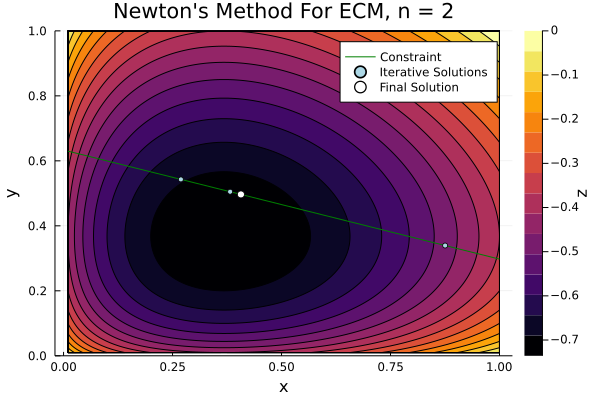

In [97]:
using Plots

solX = Float64[]
solY = Float64[]
push!(solX,xPlot[size(xPlot)[1]])
push!(solY,yPlot[size(yPlot)[1]])

plotf(x,y) = f([x, y])
c(x) = (b[1] - A[1]*x)/A[2]
_x = 0.01:0.005:1
_y = 0.01:0.005:1
X = repeat(reshape(_x, 1, :), length(_y), 1)
Y = repeat(_y, 1, length(_x))
Z = map(plotf, X, Y)
p1 = Plots.contour(_x,_y, plotf, fill = true)
plot(p1, title = "Newton's Method For ECM, n = 2", xlabel = "x", ylabel = "y", colorbar_title = "z")
plot!(c, ylims = (0,1), label = "Constraint", color = "green")
scatter!(xPlot,yPlot, label = "Iterative Solutions", color = "lightblue", markersize = 3)
scatter!(solX,solY, label = "Final Solution", color = "white", markersize = 4)

Next, we will solve the requested problem with $n = 100$ and $p = 30$

In [70]:
n = 100
p = 30

ECM = Generate_ECM(n,p,1)

A = ECM[1]
x = ECM[2]
b = ECM[3]

@time ECM_Sol = Solve_ECM(f, A, b, α, β, ϵ, x)



Iteration 0
λ^2 =         9.349497773536969
Objective =   -26.05691405319432

Iteration 1
λ^2 =         2.5740208808762035
Objective =   -31.471285093941386

Iteration 2
λ^2 =         0.4120758488947237
Objective =   -33.00597153501906

Iteration 3
λ^2 =         0.00971989237243999
Objective =   -33.23012294538948

Iteration 4
λ^2 =         7.1305763935421724e-6
Objective =   -33.23506421173678

Iteration 5
λ^2 =         5.986522547695936e-12
Objective =   -33.23506777912569  0.205273 seconds (3.12 k allocations: 4.979 MiB)


(-33.23506777912569, 6)

$\textbf{(b)}$

Now we will solve the same two problems using the Infeasible Start Newton Method.

To carry out this algorithm, start with an initial point $x_0 \in dom f$ which is not necessarily feasible. Then we compute the primal-dual Newton Step $\Delta y_{pd} = (\Delta x_{nt}, \Delta v_{nt})$. These are found by solving the following system:

$$\begin{bmatrix} \nabla^2 f(x) & A^T \\ A & 0 \end{bmatrix} \begin{bmatrix} \Delta x_{nt} \\ \Delta v_{nt} \end{bmatrix} = -\begin{bmatrix} \nabla f(x) + A^T v \\ Ax - b \end{bmatrix} = -r$$

Now, pick $t$ using backtracking line search. The difference here is that we use $\|r\|_2$ instead of function evaluations as the stoping condition for the $t := \beta t$ step. 

Finally, we update $x := x + t \Delta x_{nt}$ and $v := v + t \Delta v_{nt}$. 

Continue in this way until $x$ is feasible and $\|r(x,v)\|_2 \leq \epsilon$ for some tolerance $\epsilon$.

Below is the code for this.

In [71]:
#Computes solution using Newton Infeasible Start Method


#=
This function builds the coefficient matrix
in the system on page 533 (10.21) that is
used to compute the Newton and Dual Step
=#
function Build_IS_Matrix(_A, _At, _∇2f, _p)
    return [_∇2f _At; _A zeros(_p,_p)] 
end


#=
This function computes the dual.
See the bottom of page 531
=#
function Compute_Dual(_∇f, _At)
    return _At \ -_∇f
end


#=
This function computes
the residual.
See page 533 (10.21)
=#
function Compute_Residual(_∇f, _At, _v, _vr)
    return [_∇f + _At*_v; _vr]
end


#=
This function computes
the residual but in a
way that we can use it
for backgracking line
search.
=#
function R(_x, _v, _At, _A, _b, _f)
    return [Compute_Gradient(_f, _x) + _At*_v; _A*_x - _b]
end


#=
This function computes the
Newton and Dual Step.
See page 533 (10.22)
=#
function Compute_Steps(_∇f, _∇2f, _x, _A, _At, _vr, _p, _v, _res)
    return Build_IS_Matrix(_A, _At, _∇2f, _p) \ -_res
end


#=
This function computes t
with infeasible start
backgracking line search
See page 534, Alg. 10.2
=#
function BLS_IF(_x, _v, _A, _At, _b, _vr, _f, _∇f, _Δxnt, _Δvnt, _α, _β, _nrm)    
    _t = 1
 
    while norm(R(_x + _t*_Δxnt, _v + _t*_Δvnt, _At, _A, _b, _f)) > (1 - _α*_t)* _nrm
        _t *= _β
    end
    
    return _t
end


#Main solver function
function Solve_IFECM(g, _A, _b, _α, _β, _ϵ, _x, _n, _p, _maxIt)
    
    #Initialize necessary values for first iteration
    At = transpose(_A)
    vr = _A*_x - _b
    ∇g = Compute_Gradient(g, _x)
    _v = Compute_Dual(∇g, At)
    it = 0
    nrm = 100
    
    
    while  (norm(vr) > ϵ || nrm > ϵ) && it < _maxIt
        
        it += 1
        
        #store plot data if 3d objective
        if _n == 2
            push!(xPlot, _x[1])
            push!(yPlot, _x[2]) 
        end        
        
        ∇g = Compute_Gradient(g, _x)
        ∇2g = Compute_Hessian(g, _x)
        _v = Compute_Dual(∇g, At)

        vr = _A*_x - _b
        res = Compute_Residual(∇g, At, _v, vr)
        
        Δ = Compute_Steps(∇g, ∇2g, _x, _A, At, vr, _p, _v, res)
        Δxnt = Δ[1:_n]
        Δvnt = Δ[_n+1:_n+_p] 
        
        nrm = norm(res)
        t = BLS_IF(_x, _v, _A, At, _b, vr, g, ∇g, Δxnt, Δvnt, _α, _β, nrm)

        _x += t*Δxnt
        _v += t*Δvnt   
        
        print("\n\nIteration: ", it)
        print("\nt = ", t)
        print("\nnorm(r) = ", nrm)
#        print("\nx = ", x)
        print("\nObjective = ", g(_x))
#        print("\nΔx = ", Δxnt)

    end
    
    return g(_x), it
end

Solve_IFECM (generic function with 1 method)

Like before, we will first solve the problem with $n = 2$ and $p = 1$ for visualization purposes.

In [74]:
n = 2
p = 1

A = ECMSmall[1]
x = ECMSmall[2]
b = ECMSmall[3]

maxIt = 1e3
xPlot = Float64[]
yPlot = Float64[]
x = ones(n)*0.05 #start at (0.05, 0.05) so it shows up well on the plot

Solve_IFECM(f, A, b, α, β, ϵ, x, n, p, maxIt)



Iteration: 1
t = 0.6400000000000001
norm(r) = 7.543731207622111
Objective = -0.6881997878880277

Iteration: 2
t = 1
norm(r) = 2.7410294639860164
Objective = -0.7085280187693257

Iteration: 3
t = 1
norm(r) = 0.16200964659163802
Objective = -0.7134563210793958

Iteration: 4
t = 1
norm(r) = 0.010618160603553415
Objective = -0.713479542750689

Iteration: 5
t = 1
norm(r) = 4.8370223445600536e-5
Objective = -0.7134795432355288

Iteration: 6
t = 1
norm(r) = 1.0108505423171161e-9
Objective = -0.7134795432355288

(-0.7134795432355288, 6)

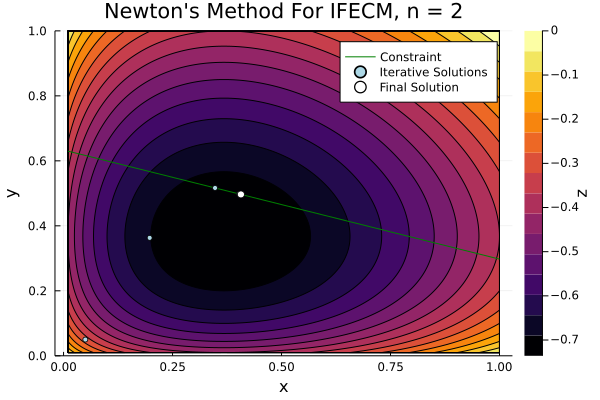

In [75]:
solX = Float64[]
solY = Float64[]
push!(solX,xPlot[size(xPlot)[1]])
push!(solY,yPlot[size(yPlot)[1]])

plotf(x,y) = f([x, y])
c(x) = (b[1] - A[1]*x)/A[2]
_x = 0.01:0.005:1
_y = 0.01:0.005:1
X = repeat(reshape(_x, 1, :), length(_y), 1)
Y = repeat(_y, 1, length(_x))
Z = map(plotf, X, Y)
p1 = Plots.contour(_x,_y, plotf, fill = true)
plot(p1, title = "Newton's Method For IFECM, n = 2", xlabel = "x", ylabel = "y", colorbar_title = "z")
plot!(c, ylims = (0,1), label = "Constraint", color = "green")
scatter!(xPlot,yPlot, label = "Iterative Solutions", color = "lightblue", markersize = 3)
scatter!(solX,solY, label = "Final Solution", color = "white", markersize = 4)

Notice that the iterative solutions start infeasible and converge to feasibility.

Now, we solve the requested problem with $n = 100$ and $p = 30$

In [76]:
n = 100
p = 30

A = ECM[1]
x = ECM[2]
b = ECM[3]

maxIt = 1e3
xPlot = Float64[]
yPlot = Float64[]
x = ones(n)

IF_ICM_Sol = Solve_IFECM(f, A, b, α, β, ϵ, x, n, p, maxIt)



Iteration: 1
t = 1
norm(r) = 144.36334146558914
Objective = -33.065491936120054

Iteration: 2
t = 1
norm(r) = 1.0369413738815156
Objective = -33.23242379495825

Iteration: 3
t = 1
norm(r) = 0.14627187020629745
Objective = -33.235060994992786

Iteration: 4
t = 1
norm(r) = 0.007408935415815113
Objective = -33.23506777906687

Iteration: 5
t = 1
norm(r) = 2.23272892588862e-5
Objective = -33.235067779128684

Iteration: 6
t = 3.213876088517993e-7
norm(r) = 3.1763259035947237e-9
Objective = -33.235067779128684

(-33.235067779128684, 6)

$\textbf{(c)}$ 

Now, we will compute the solution using the Dual Newton Method. For this, we need an expression for $x^*$ so we can substitute into the Lagrangian. Since $\nabla f(x) = \begin{bmatrix} \log(x_1) \\ \vdots \\ \log(x_n) \end{bmatrix} + \vec{1}$, we can solve for $x^*$ in the dual condition $\nabla f(x^*) + A^T v = 0$. We get the following for $x^*$:

$$x^* = \exp( (-A^T v - \vec{1}))$$

Here, we are taking the exponential componentwise.

In [77]:
#Solves the problem using the dual

#Expresses x* in terms of the dual
function x_Star(_At, _v, _n)
    return exp.(-_At * _v - ones(_n)) #todo: broadcast vector subraction
end

#L(x*, v) turns into L(v). We can now 
#Use the unconstrained Newton Method to
#solve for the dual
function L(_f, _A, _b, _v, _n)
    
    xstar = x_Star(transpose(_A), _v, _n)
    
    return _f(xstar) + transpose(_v) * (_A*xstar - _b)
end



L (generic function with 1 method)

In [78]:
n = 100
p = 30

A = ECM[1]
x = ECM[2]
b = ECM[3]

v0 = Compute_Dual(Compute_Gradient(f,x) , transpose(A))
LL(v) = -L(f, A, b, v, n) #This is our new objective. We want to minimize the negative of the Lagrangian

LL (generic function with 1 method)

Now, we can just reuse the Unconstrained_Newton method from problem 9.30 to solve for $v^*$ which directly will give us $x^*$.

In [79]:
dualSol = Unconstrained_Newton(LL, v0, n, α, β, ϵ, p, maxIt, false, false) #compute dual solution

From_Dual_Sol = f(x_Star(transpose(A), dualSol[3], n)) #Plug x* evaluated at our dual solution into f 

-33.2350677816278

In [80]:
print("\nEquality Constrained Solutions:\n\nFeasible Start: ",ECM_Sol[1], "\nInfeasible Start: ", IF_ICM_Sol[1], "\nFrom Dual: ", From_Dual_Sol)


Equality Constrained Solutions:

Feasible Start: -33.23506777912569
Infeasible Start: -33.235067779128684
From Dual: -33.2350677816278

As can be seen, the three solutions from each method are the same within our $\epsilon$.

Now we will test per-iteration runtime of each method.

In [81]:
#Function to bench per-iteration runtime for a given algorithm over a fixed problem size
function Bench_ECM_Methods(n, p, cycles) 
    time = zeros(4)
    
    for i = 1:cycles

        ECM = Generate_ECM(n, p, 1) #These bounds make the problem more likely to stay in the domain

        A = ECM[1]
        x = ECM[2]
        b = ECM[3]
    
        
        #Feasible Start NM
        temp = @elapsed ECM_Sol = Solve_ECM(f, A, b, α, β, ϵ, x)
        time[1] += temp/ECM_Sol[2] #Get average iteration time
        
        #Infeasible Start NM starting feasible
        temp = @elapsed IF_ICM_Sol = Solve_IFECM(f, A, b, α, β, ϵ, x, n, p, maxIt)
        time[2] += temp/IF_ICM_Sol[2]

        #Infeasible Start NM starting infeasible
        x = ones(n)
        temp = @elapsed IF_ICM_Sol = Solve_IFECM(f, A, b, α, β, ϵ, x, n, p, maxIt)
        time[3] += temp/IF_ICM_Sol[2]
        
        #Dual Method
        v0 = Compute_Dual(Compute_Gradient(f,x) , transpose(A))
        x = ECM[2]
        LL(v) = -L(f, A, b, v, n)
        temp = @elapsed Dual_Sol = Unconstrained_Newton(LL, v0, n, α, β, ϵ, p, maxIt, false, false)
        time[4] += temp/Dual_Sol[2]
    end
    
    return time ./ cycles
end

Bench_ECM_Methods (generic function with 1 method)

In [ ]:
itTimes = Bench_ECM_Methods(100, 30, 3)

In [85]:
print("\nAverage Time Per Iteration")
print("\n\nFeasible Start Newton Method:         ", itTimes[1])
print("\nInfeasible Start Starting Feasible:   ", itTimes[2])
print("\nInfeasible Start Starting Infeasible: ", itTimes[3])
print("\nDual Method Starting Feasible:        ", itTimes[4])


Average Time Per Iteration

Feasible Start Newton Method:         0.029761911849206346
Infeasible Start Starting Feasible:   0.03128247801785714
Infeasible Start Starting Infeasible: 0.03374068894444445
Dual Method Starting Feasible:        0.045037000066666666

Each method appears to have about the same computational strain on each iteration except for the Dual Method. Though, this method can be optimized further by choosing a better starting point with the gradient descent method.

Sources:

Convex Optimization, by Stephen P. Boyd and Lieven Vandenberghe, Cambridge University Press, 2018